In [11]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")

file_path = 'combined_data.csv'

df = pd.read_csv(file_path)



In [12]:

from sklearn.cluster import KMeans


# Droping missing values in balance preparing the data for k-means clustering
smb_gen2_data = df[df['Product'] == 'SMB Gen2'].copy().dropna(subset=['Balance'])

# Extract the 'Balance' column for clustering
X = smb_gen2_data[['Balance']].values  

# Apply KMeans clustering with an explicit n_init value
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
smb_gen2_data['Cluster'] = kmeans.fit_predict(X)



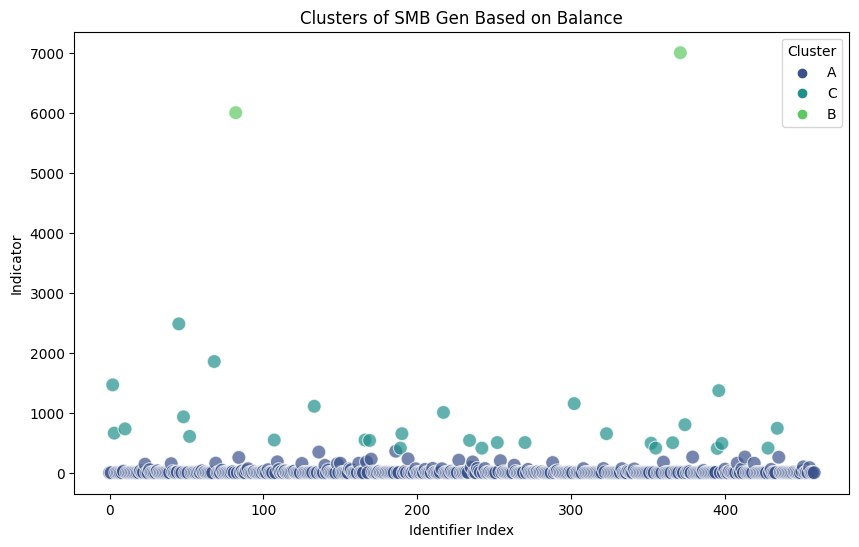

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Map numerical cluster IDs to letters
cluster_name_mapping = {0: 'A', 1: 'B', 2: 'C'}
smb_gen2_data['ClusterName'] = smb_gen2_data['Cluster'].map(cluster_name_mapping)

# Correcting the hue parameter to use 'ClusterName'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=smb_gen2_data, x=np.arange(len(smb_gen2_data)), y='Balance', hue='ClusterName', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of SMB Gen Based on Balance')
plt.xlabel('Identifier Index')
plt.ylabel('Indicator') 
plt.legend(title='Cluster')
plt.show()

s.

In [15]:
# Calculate the balance range for each cluster
cluster_ranges = smb_gen2_data.groupby('Cluster')['Balance'].agg(['min', 'max'])

# Sort the DataFrame by the minimum balance to ensure we're processing in the correct order.
cluster_ranges = cluster_ranges.sort_values(by='min')

# Adjust the ranges to ensure continuity
for i in range(1, len(cluster_ranges)):
    prev_max = cluster_ranges.iloc[i-1]['max']
    current_min = cluster_ranges.iloc[i]['min']
    
    # Check if there's a gap
    if prev_max < current_min:
        cluster_ranges.at[cluster_ranges.index[i], 'min'] = prev_max + 0.01 




In [16]:
# Prepare data for recommendation by filtering out the first product
other_products_data = df[df['Product'] != 'SMB Gen2']

# Initialize a dictionary to store the top product for each cluster
top_products_for_clusters = {}

for cluster in smb_gen2_data['Cluster'].unique(): #getting all the identifiers from the existed clusters
    identifiers = smb_gen2_data[smb_gen2_data['Cluster'] == cluster]['Identifier'].unique()
    
    # Filter other_products_data for these identifiers
    cluster_other_products_data = other_products_data[other_products_data['Identifier'].isin(identifiers)]
    
    # Find the most frequently purchased product for this cluster
    if not cluster_other_products_data.empty:
        top_product = cluster_other_products_data['Product'].value_counts().idxmax()
        top_products_for_clusters[cluster] = top_product
    else:
        top_products_for_clusters[cluster] = "No other product purchased"


# Display the desired output, with numbers rounded to the second decimal place
for cluster in sorted(top_products_for_clusters.keys()):
    min_balance, max_balance = cluster_ranges.loc[cluster]
    top_product = top_products_for_clusters[cluster]
    
    # Rounding the balance range values for display
    min_balance = round(min_balance, 2)
    max_balance = round(max_balance, 2)
    
    print(f"Cluster {cluster}")
    print(f"Indicator range from {min_balance} to {max_balance}")
    print(f"The Predict product token is {top_product} name\n")


Cluster 0
Indicator range from 0.0 to 358.77
The Predict product token is Mad Lads name

Cluster 1
Indicator range from 2480.69 to 7000.01
The Predict product token is No other product purchased name

Cluster 2
Indicator range from 358.78 to 2480.68
The Predict product token is Frogana name

